# Old, Elementary Code

## Primarily a Sanity Check 

In [1]:
# --- importing libraries ---

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from scipy.stats import ttest_ind

import os
parent_dir = os.getcwd()

In [3]:
# --- 3D sphere image generation ---

In [4]:
# generate 3D spherical data (replace with actual data later)
N = 28 # dimensions of 3D array (x, y, z all the same in this case)

# initialize array
sphere_array = np.zeros((N, N, N))

# define the center and radius of the sphere
c = (N//2, N//2, N//2) # // floor division to obtain integers
r = min(N, N, N)//4

# loop thorugh array and set values for the sphere 
for x in range(N): # width
    for y in range(N): # height
        for z in range(N): # depth
            
            # distance from current point to the center 
            dist = np.sqrt((x-c[0])**2 + (y-c[1])**2 + (z-c[2])**2)
            
            if dist <= r:
                # calculate vertical position and normalize between 0-1
                vert_position = 1 - (dist/r) 
                
                # assign gradient value
                gradient_val = vert_position
                
                # store value in array
                sphere_array[x, y, z] = gradient_val

# the sphere contains a gradient, points closer to the center have higher values 

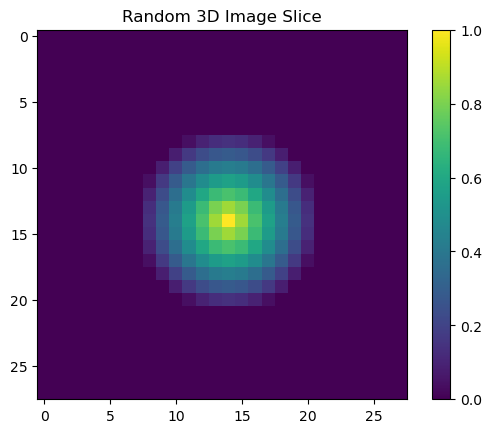

In [5]:
# display a slice of 3D array
slice_idx = N // 2 # central slice in the z direction (since N=28 for all dimensions)
plt.imshow(sphere_array[:,:,slice_idx]) 

plt.title('Random 3D Image Slice') # 14th slice 
plt.colorbar()
plt.show()

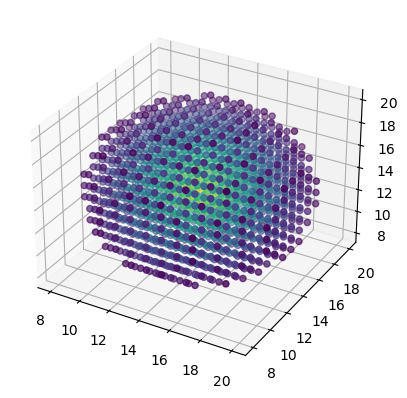

In [6]:
# 3D plot of sphere 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# mesh grid of coordinates 
x,y,z = np.meshgrid(range(N), range(N), range(N))

# plot points with values greater than zero
mask = sphere_array > 0
ax.scatter(x[mask], y[mask], z[mask], c=sphere_array[mask])

plt.show()

In [7]:
# --- generate k-space points, calculate phasors, display real/imaginary images ---

In [8]:
# load in the array 
#sphere_array = np.load((os.path.join(parent_dir, '3D_sphere_gradient_array.npy')))

# defining the imaginary unit 
I = 1j 

In [9]:
# creating 3D grids for x, y, and z dimensions
x, y, z = np.meshgrid(np.arange(-13,15), np.arange(-13,15), np.arange(-13,15))

In [10]:
# flatten 3D grids into 1D arrays
# ravel is faster than flatten, does not occupy memory
kx_0 = np.ravel(x)
ky_0 = np.ravel(y)
kz_0 = np.ravel(z)

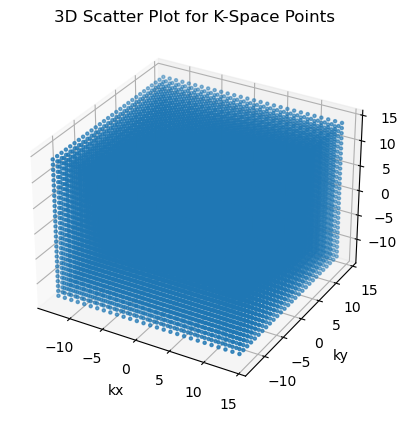

In [11]:
# create 3D scatter plot for kx, ky, kz
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(kx_0, ky_0, kz_0, s=5)

ax.set_xlabel('kx')
ax.set_ylabel('ky')
ax.set_zlabel('kz')
ax.set_title('3D Scatter Plot for K-Space Points')

plt.show()

In [12]:
# create an empty array to store phasors 
perfect_phasors = np.zeros_like(kx_0, dtype=complex)

# calculate phasors for each data point 
for k in range(len(kx_0)):
    perfect_phasors[k] = np.sum(sphere_array*np.exp(I*x*kx_0[k]*2*np.pi/N + I*y*ky_0[k]*2*np.pi/N + I*z*kz_0[k]*2*np.pi/N))
# P.S. this step is not the fastest....10-20 seconds 

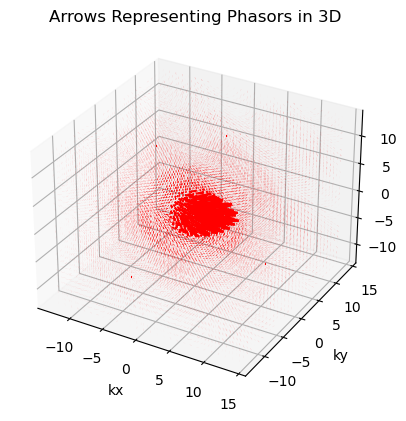

In [14]:
# create arrows for phasors in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# quiver plot to show phasors
ax.quiver(kx_0, ky_0, kz_0, np.real(perfect_phasors)/30, np.imag(perfect_phasors)/30, np.zeros_like(perfect_phasors), 
          color='red', length=0.5)

ax.set_xlabel('kx')
ax.set_ylabel('ky')
ax.set_zlabel('kz')
ax.set_title('Arrows Representing Phasors in 3D')

plt.show()

In [15]:
# generate empty array to store f values
f = np.zeros_like(x, dtype=complex)

# calculate f using phasors
for k in range(len(kx_0)):
    f = f + perfect_phasors[k] * np.exp(-I*x*kx_0[k]*2*np.pi/N - I*y*ky_0[k]*2*np.pi/N - I*z*kz_0[k]*2*np.pi/N)

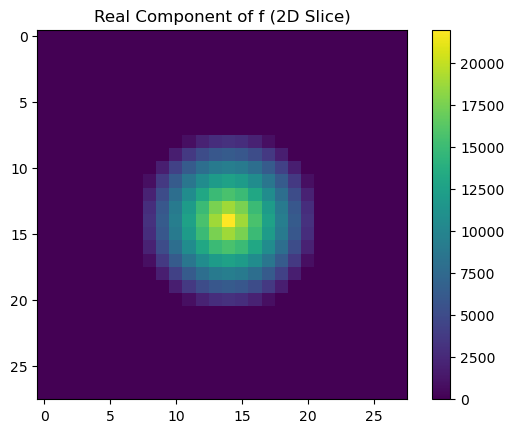

In [16]:
# display real component of f (single slice)
slice_idx = f.shape[2] // 2 # central slice in z
plt.imshow(np.real(f[:,:,slice_idx]))

plt.title('Real Component of f (2D Slice)')
plt.colorbar()
plt.show()

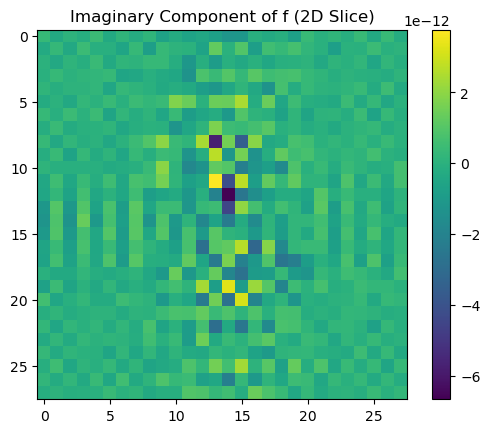

In [17]:
# display imaginary component of f (single slice)
slice_idx = f.shape[2] // 2 # central slice in z
plt.imshow(np.imag(f[:,:,slice_idx]))

plt.title('Imaginary Component of f (2D Slice)')
plt.colorbar()
plt.show()

In [18]:
# --- for random, uniform points in k-space (requiring linear interpolation) ---

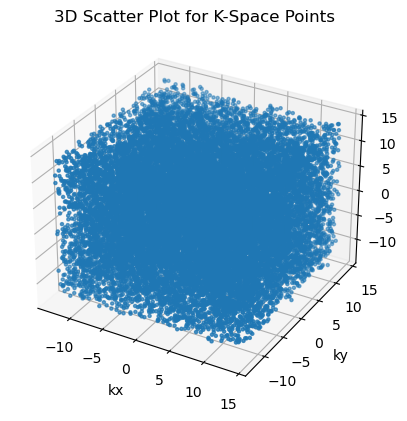

In [19]:
# generate random values for kx, ky, kz
kx_1 = np.random.uniform(-13, 14, 28*28*28)
ky_1 = np.random.uniform(-13, 14, 28*28*28)
kz_1 = np.random.uniform(-13, 14, 28*28*28)

# create 3D scatter plot for kx, ky, kz
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(kx_1, ky_1, kz_1, s=5)

ax.set_xlabel('kx')
ax.set_ylabel('ky')
ax.set_zlabel('kz')
ax.set_title('3D Scatter Plot for K-Space Points')

plt.show()

In [20]:
# create an empty array to store phasors 
phasors = np.zeros_like(kx_1, dtype=complex)

# calculate phasors for each data point 
for k in range(len(kx_1)):
    phasors[k] = np.sum(sphere_array*np.exp(I*x*kx_1[k]*2*np.pi/N + I*y*ky_1[k]*2*np.pi/N + I*z*kz_1[k]*2*np.pi/N))

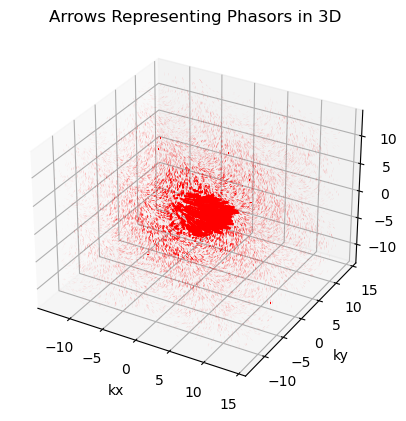

In [21]:
# create arrows for phasors in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# quiver plot to show phasors
ax.quiver(kx_1, ky_1, kz_1, np.real(phasors)/30, np.imag(phasors)/30, np.zeros_like(phasors), 
          color='red', length=0.5)

ax.set_xlabel('kx')
ax.set_ylabel('ky')
ax.set_zlabel('kz')
ax.set_title('Arrows Representing Phasors in 3D')

plt.show()

In [22]:
# interpolation to rectilinear k-space  
cast_list = np.column_stack((kx_0, ky_0, kz_0))
random_traj = np.column_stack((kx_1.ravel(), ky_1.ravel(), kz_1.ravel()))

# using linear method
real = griddata(random_traj, phasors.real, cast_list, method='linear', rescale=True)
imag = griddata(random_traj, phasors.imag, cast_list, method='linear', rescale=True)

new_phasors = real + I*imag

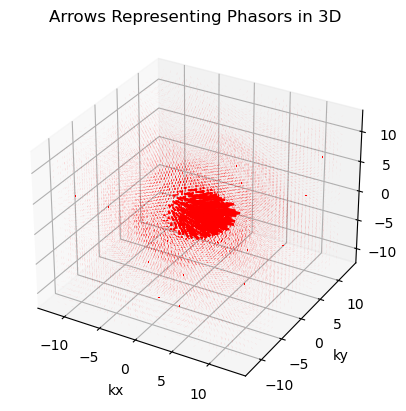

In [23]:
# plotting new phasors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# quiver plot to show phasors
ax.quiver(kx_0, ky_0, kz_0, np.real(new_phasors)/30, np.imag(new_phasors)/30, np.zeros_like(new_phasors), 
          color='red', length=0.5)

ax.set_xlabel('kx')
ax.set_ylabel('ky')
ax.set_zlabel('kz')
ax.set_title('Arrows Representing Phasors in 3D')

plt.show()

In [24]:
# how many nan values?
non_nan_count = np.count_nonzero(~np.isnan(new_phasors))
nan_count = np.count_nonzero(np.isnan(new_phasors))

print('Non-NAN Values: ' + str(non_nan_count))
print('NAN Values: ' + str(nan_count))

nan_count/len(new_phasors)*100 # percentage of nan values 

Non-NAN Values: 17575
NAN Values: 4377


19.938957725947525

In [25]:
# removing nan values 
#new_phasors = new_phasors[np.logical_not(np.isnan(new_phasors))]
# will get all nan values for f if this step is skipped...
#new_phasors.shape

In [26]:
# generate empty array to store f values
f1 = np.zeros_like(x, dtype=complex)

# calculate f using phasors
for k in range(len(kx_1)):
    if ~np.isnan(new_phasors[k]):
        f1 = f1 + new_phasors[k] * np.exp(-I*x*kx_0[k]*2*np.pi/N - I*y*ky_0[k]*2*np.pi/N - I*z*kz_0[k]*2*np.pi/N)

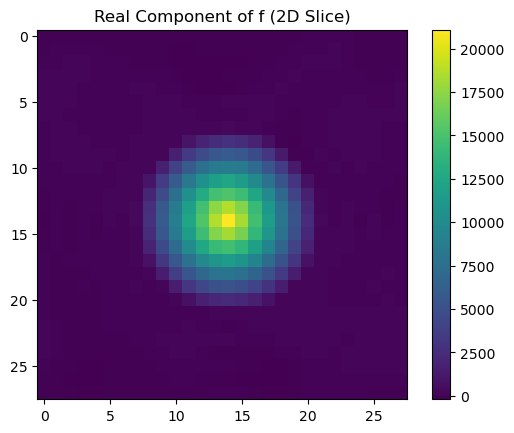

In [27]:
# display real component of f (single slice)
slice_idx = f1.shape[2] // 2 # central slice in z
plt.imshow(np.real(f1[:,:,slice_idx]))

plt.title('Real Component of f (2D Slice)')
plt.colorbar()
plt.show()

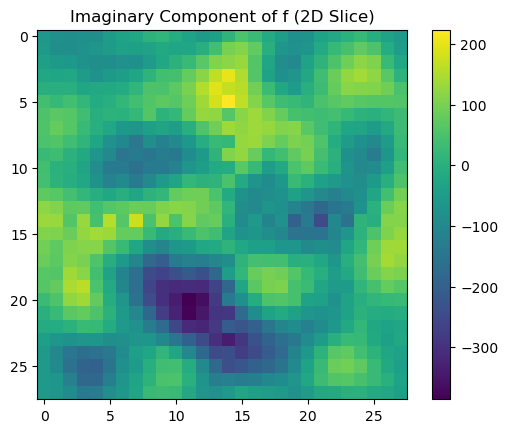

In [28]:
# display imaginary component of f (single slice)
slice_idx = f1.shape[2] // 2 # central slice in z
plt.imshow(np.imag(f1[:,:,slice_idx]))

plt.title('Imaginary Component of f (2D Slice)')
plt.colorbar()
plt.show()

In [29]:
# --- for random, uniform points in k-space (nearest interpolation) ---

In [30]:
# using nearest method because many of the input points were outside of the convex hull (many nans)
real = griddata(random_traj, phasors.real, cast_list, method='nearest', rescale=True)
imag = griddata(random_traj, phasors.imag, cast_list, method='nearest', rescale=True)

new_phasors = real + I*imag

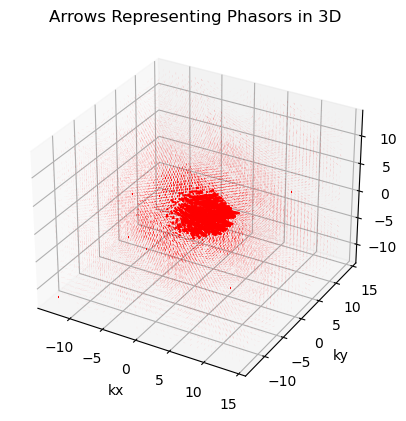

In [31]:
# plotting new phasors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# quiver plot to show phasors
ax.quiver(kx_0, ky_0, kz_0, np.real(new_phasors)/30, np.imag(new_phasors)/30, np.zeros_like(new_phasors), 
          color='red', length=0.5)

ax.set_xlabel('kx')
ax.set_ylabel('ky')
ax.set_zlabel('kz')
ax.set_title('Arrows Representing Phasors in 3D')

plt.show()

In [32]:
# how many nan values? 
# should be none with the nearest method 
non_nan_count = np.count_nonzero(~np.isnan(new_phasors))
nan_count = np.count_nonzero(np.isnan(new_phasors))

print('Non-NAN Values: ' + str(non_nan_count))
print('NAN Values: ' + str(nan_count))

nan_count/len(new_phasors)*100 # percentage of nan values 

Non-NAN Values: 21952
NAN Values: 0


0.0

In [33]:
# generate empty array to store f values
f2 = np.zeros_like(x, dtype=complex)

# calculate f using phasors
for k in range(len(kx_1)):
    f2 = f2 + new_phasors[k] * np.exp(-I*x*kx_0[k]*2*np.pi/N - I*y*ky_0[k]*2*np.pi/N - I*z*kz_0[k]*2*np.pi/N)

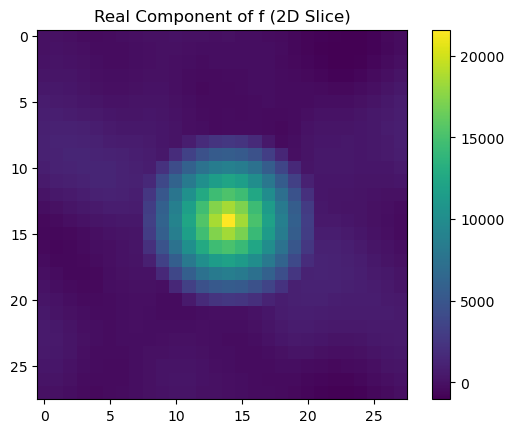

In [34]:
# display real component of f (single slice)
slice_idx = f2.shape[2] // 2 # central slice in z
plt.imshow(np.real(f2[:,:,slice_idx]))

plt.title('Real Component of f (2D Slice)')
plt.colorbar()
plt.show()

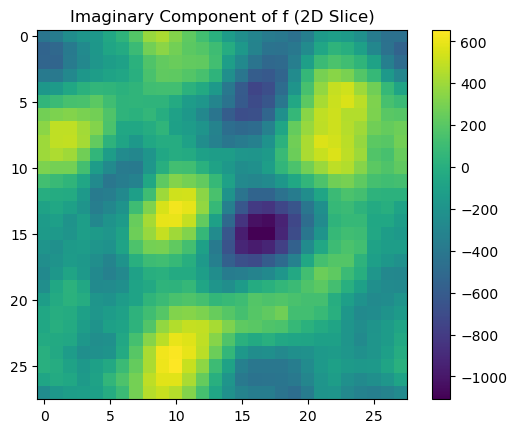

In [35]:
# display imaginary component of f (single slice)
slice_idx = f2.shape[2] // 2 # central slice in z
plt.imshow(np.imag(f2[:,:,slice_idx]))

plt.title('Imaginary Component of f (2D Slice)')
plt.colorbar()
plt.show()

In [ ]:
# --- comparing perfect data to linear and nereast interpolation methods ---

<BarContainer object of 1 artists>

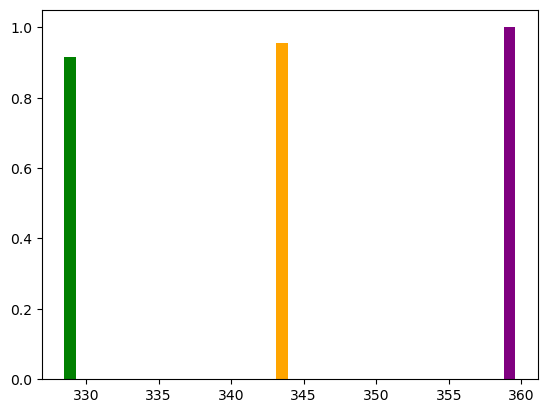

In [36]:
# examining the means of the 3 groups 
mean_0 = np.mean(f.ravel()) # the standard ("perfect")
mean_1 = np.mean(f1.ravel()) # linear interpolation
mean_2 = np.mean(f2.ravel()) # nearest interpolation 

plt.bar(mean_0.real, height=1, color='purple') # the standard ("perfect")
plt.bar(mean_1.real, height=mean_1.real/mean_0.real, color='green') # proportion of standard 
plt.bar(mean_2.real, height=mean_2.real/mean_0.real, color='orange')

/Users/mia/opt/anaconda3/envs/DukePipeline/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


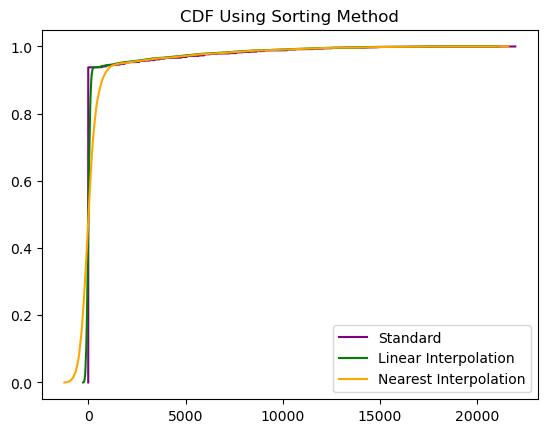

In [37]:
# Cumulative Distribution Function (CDF)
# perfect data 
x_0 = np.sort(f.ravel())
y_0 = np.arange(len(f.ravel())) / float(len(f.ravel()))

# linear interpolation 
x_1 = np.sort(f1.ravel())
y_1 = np.arange(len(f1.ravel())) / float(len(f1.ravel()))

# nearest interpolation 
x_2 = np.sort(f2.ravel())
y_2 = np.arange(len(f2.ravel())) / float(len(f2.ravel()))

plt.title('CDF Using Sorting Method')

plt.plot(x_0, y_0, color='purple', label='Standard')
plt.plot(x_1, y_1, color='green', label='Linear Interpolation')
plt.plot(x_2, y_2, color='orange', label='Nearest Interpolation')

plt.legend()

In [38]:
# --- using 3D kush ball k-space trajectory ---

In [40]:
from scipy.io import loadmat

current_dir = os.getcwd()
if current_dir.endswith('DataSynthesizer'):
    os.chdir('..') 
traj = loadmat('traj/traj_gas_afia.mat')

# return to original directory
current_dir = os.getcwd()
if current_dir.endswith('Recon'):
    os.chdir(parent_dir)

In [41]:
traj['data'].shape

(1000, 64, 3)

In [42]:
# k-space x, y, and z points 
kx = traj['data'][:,:,0].ravel()
ky = traj['data'][:,:,1].ravel()
kz = traj['data'][:,:,2].ravel()

# rescaling based on N
kx = kx*N
ky = ky*N
kz = kz*N

trajlist = np.column_stack((kx,ky,kz))

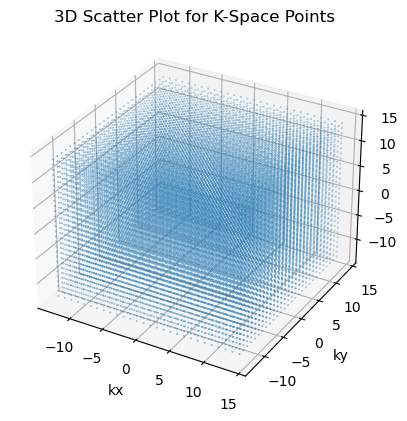

In [43]:
# create 3D scatter plot for kx, ky, kz
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cast_list[:,0], cast_list[:,1], cast_list[:,2], s=0.1)

ax.set_xlabel('kx')
ax.set_ylabel('ky')
ax.set_zlabel('kz')
ax.set_title('3D Scatter Plot for K-Space Points')

plt.show()

In [44]:
# create an empty array to store phasors 
phasors = np.zeros_like(kx, dtype=complex)

# calculate phasors for each data point 
for k in range(len(kx)):
    phasors[k] = np.sum(sphere_array*np.exp(I*x*kx[k]*2*np.pi/N + I*y*ky[k]*2*np.pi/N + I*z*kz[k]*2*np.pi/N))

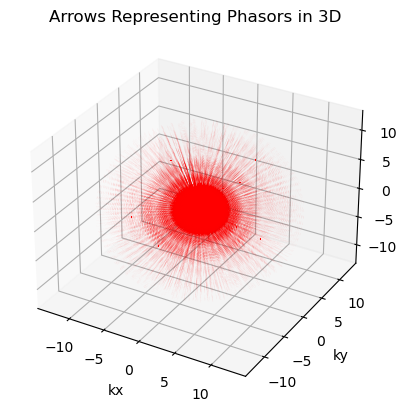

In [45]:
# create arrows for phasors in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# quiver plot to show phasors
ax.quiver(kx, ky, kz, np.real(phasors)/30, np.imag(phasors)/30, np.zeros_like(phasors), 
          color='red', length=0.1)

ax.set_xlabel('kx')
ax.set_ylabel('ky')
ax.set_zlabel('kz')
ax.set_title('Arrows Representing Phasors in 3D')

plt.show()

In [46]:
# preparing casting list 
cast_list = np.column_stack((kx_0, ky_0, kz_0))
cast_list.shape
keep = (kx_0**2 + ky_0**2 + kz_0**2) < 13**2 # no point including points outside radius of trajectory 
cast_list = cast_list[keep,:]
cast_list.shape

(9093, 3)

In [47]:
# interpolating to Cartesian space 
real = griddata(trajlist, phasors.real, cast_list, method='linear')
imag = griddata(trajlist, phasors.imag, cast_list, method='linear')

new_phasors = real + I*imag

In [48]:
# how many nan values?
non_nan_count = np.count_nonzero(~np.isnan(new_phasors))
nan_count = np.count_nonzero(np.isnan(new_phasors))

print('Non-NAN Values: ' + str(non_nan_count))
print('NAN Values: ' + str(nan_count))

nan_count/len(new_phasors)*100 # percentage of nan values 

Non-NAN Values: 8726
NAN Values: 367


4.036071703508193

In [49]:
# generate empty array to store f values
f3 = np.zeros_like(x, dtype=complex)

# calculate f using phasors
for k in range(cast_list.shape[0]):
     if ~np.isnan(new_phasors[k]):
        f3 = f3 + new_phasors[k] * np.exp(-I*x*cast_list[k,0]*2*np.pi/N - I*y*cast_list[k,1]*2*np.pi/N - I*z*cast_list[k,2]*2*np.pi/N)

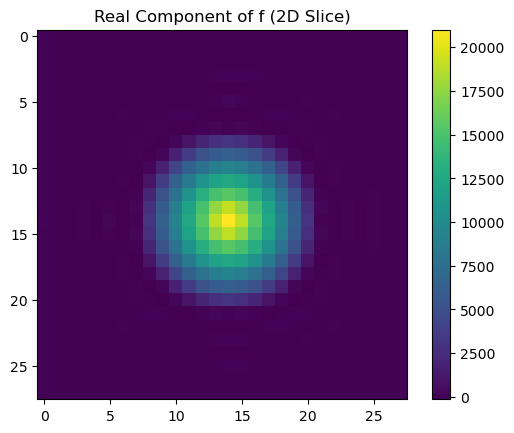

In [50]:
# display real component of f (single slice)
slice_idx = f3.shape[2] // 2 # central slice in z
plt.imshow(np.real(f3[:,:,slice_idx]))

plt.title('Real Component of f (2D Slice)')
plt.colorbar()
plt.show()

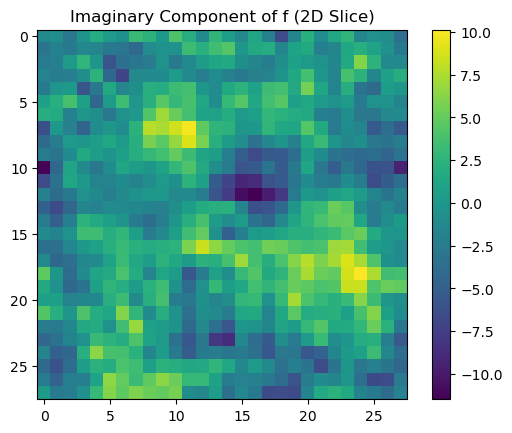

In [51]:
# display imaginary component of f (single slice)
slice_idx = f3.shape[2] // 2 # central slice in z
plt.imshow(np.imag(f3[:,:,slice_idx]))

plt.title('Imaginary Component of f (2D Slice)')
plt.colorbar()
plt.show()

In [52]:
# --- random chunk for later analyses --- 

In [53]:
# lung-imitating phantom 
## -- loading a mask saved from old dataset
#mask = np.load('C:/PIRL/data/ReconData/UTEmask.np.npy')[np.arange(127,-1,-1),:,:]
#MEM = RBC = mask
#mg = np.meshgrid(np.arange(MEM.shape[1]),np.arange(MEM.shape[0]),np.arange(MEM.shape[2]))
## -- add some defects and the heart for RBC
#MEM = MEM - ((mg[1]-64)**2 + (mg[0]-34)**2 + (mg[2]-70)**2 < 7**2)*1
#RBC = RBC - ((mg[1]-64)**2 + (mg[0]-88)**2 + (mg[2]-70)**2 < 7**2)*1 + ((mg[1]-75)**2 + (mg[0]-64)**2 + ((mg[2]-60))**2 < 10**2)*1

#DP = MEM + 1j*RBC